In [ ]:
%pip install tensorflow==2.9.0
%pip install ampligraph
%pip install networkx
%pip install matplotlib


[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd
import ampligraph
import tensorflow as tf

## Dataset

https://www.kaggle.com/datasets/saurabhshahane/music-dataset-1950-to-2019

In [ ]:
df = pd.read_csv("tcc_ceds_music.csv").sort_values("release_date")

In [ ]:
df.isna().sum()

Unnamed: 0                  0
artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
like/girls                  0
sadness                     0
feelings                    0
danceability                0
loudness                    0
acousticness                0
instrumentalness            0
valence                     0
energy                      0
topic                       0
age                         0
dtype: int64

–í—Å–µ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–µ–Ω—É–ª–µ–≤—ã–µ - –Ω–∏—á–µ–≥–æ –Ω–µ –¥—Ä–æ–ø–∞–µ–º

–í —Ç—Ä–µ–Ω. –≤—ã–±–æ—Ä–∫—É –≤—Å–µ —Ç—Ä–µ–∫–∏ –¥–æ 2014, –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ —Å 1950 –¥–æ 2019

In [ ]:
df["train"] = df.release_date < 2013

In [ ]:
df.train.value_counts()

train
True     24278
False     4094
Name: count, dtype: int64

## –°–æ–∑–¥–∞–Ω–∏–µ –≥—Ä–∞—Ñ–∞ –∑–Ω–∞–Ω–∏–π

In [ ]:
triples = []
for i, row in df[df["train"]].iterrows():
    # –°—É—â–µ—Å—Ç–≤—É—é—â–∏–µ –æ—Ç–Ω–æ—à–µ–Ω–∏—è
    track = (row["track_name"], "isTrackOfArtist", row["artist_name"])
    track_genre = (row["track_name"], "hasGenre", row["genre"])
    release_date = (row["track_name"], "releasedOn", row["release_date"])
    sadness = (row["track_name"], "hasSadnessScore", row["sadness"])
    energy = (row["track_name"], "hasEnergy", row["energy"])
    danceability = (row["track_name"], "hasDanceability", row["danceability"])
    topic = (row["track_name"], "hasTopic", row["topic"])

    # –ù–æ–≤—ã–µ –æ—Ç–Ω–æ—à–µ–Ω–∏—è
    # –û—Ç–Ω–æ—à–µ–Ω–∏–µ –º–µ–∂–¥—É —Ç—Ä–µ–∫–æ–º –∏ —ç–ø–æ—Ö–æ–π (–¥–µ—Å—è—Ç–∏–ª–µ—Ç–∏–µ)
    era = f"{int(row['release_date']) // 10 * 10}s"  # –ü—Ä–∏–º–µ—Ä: "1950s"
    track_era = (row["track_name"], "belongsToEra", era)

    # –û—Ç–Ω–æ—à–µ–Ω–∏–µ –º–µ–∂–¥—É –∞—Ä—Ç–∏—Å—Ç–æ–º –∏ –∂–∞–Ω—Ä–æ–º
    artist_genre = (row["artist_name"], "createsInGenre", row["genre"])

    # –¢—Ä–µ–∫ –∏ –∂–∞–Ω—Ä –≤—ã–∑—ã–≤–∞—é—Ç —ç–º–æ—Ü–∏—é –∏–ª–∏ —Ç–µ–º—ã
    genre_emotion = (row["genre"], "invokesEmotion", row["topic"])
    track_emotion = (row["track_name"], "invokesEmotion", row["topic"])

    # –û—Ç–Ω–æ—à–µ–Ω–∏—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –º–µ–∂–¥—É —Ç—Ä–µ–∫–∞–º–∏ (–Ω–∞ –æ—Å–Ω–æ–≤–µ —Ç–∞–Ω—Ü–µ–≤–∞–ª—å–Ω–æ—Å—Ç–∏ –∏ –≥—Ä–æ–º–∫–æ—Å—Ç–∏)
    for _, compare_row in df[i:i+10].iterrows():
        if row["track_name"] != compare_row["track_name"]:
            if row["danceability"] > compare_row["danceability"]:
                comparison = (row["track_name"], "moreDanceableThan", compare_row["track_name"])
                triples.append(comparison)
            if row["loudness"] > compare_row["loudness"]:
                comparison = (row["track_name"], "louderThan", compare_row["track_name"])

    # –û—Ç–Ω–æ—à–µ–Ω–∏—è –º–µ–∂–¥—É —Ç—Ä–µ–∫–∞–º–∏ –æ–¥–Ω–æ–≥–æ –∞—Ä—Ç–∏—Å—Ç–∞ (–Ω–∞–ø—Ä–∏–º–µ—Ä, —Å–æ—Ç—Ä—É–¥–Ω–∏—á–µ—Å—Ç–≤–æ)
    if row["artist_name"] == compare_row["artist_name"]:
        collab = (row["track_name"], "collaboratesWith", compare_row["track_name"])
        triples.append(collab)

    # –î–æ–±–∞–≤–∏—Ç—å –≤—Å–µ —Ç—Ä–∏–ø–ª–µ—Ç—ã –¥–ª—è —ç—Ç–æ–π —Å—Ç—Ä–æ–∫–∏
    triples.extend([track, track_genre, release_date, sadness, energy, danceability, topic, track_era, artist_genre, genre_emotion, track_emotion])

# –ü—Ä–∏–º–µ—Ä: –≤—ã–≤–æ–¥ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö —Ç—Ä–∏–ø–ª–µ—Ç–æ–≤
for triple in triples[:10]:
    print(triple)

('mohabbat bhi jhoothi', 'moreDanceableThan', 'three wishes')
('mohabbat bhi jhoothi', 'moreDanceableThan', 'just for fun')
('mohabbat bhi jhoothi', 'moreDanceableThan', 'absence makes the heart grow fonder (for somebody else)')
('mohabbat bhi jhoothi', 'moreDanceableThan', 'vieni su (say you love me, too)')
('mohabbat bhi jhoothi', 'isTrackOfArtist', 'mukesh')
('mohabbat bhi jhoothi', 'hasGenre', 'pop')
('mohabbat bhi jhoothi', 'releasedOn', 1950)
('mohabbat bhi jhoothi', 'hasSadnessScore', 0.380298895230333)
('mohabbat bhi jhoothi', 'hasEnergy', 0.1371101880258922)
('mohabbat bhi jhoothi', 'hasDanceability', 0.3577385465179248)


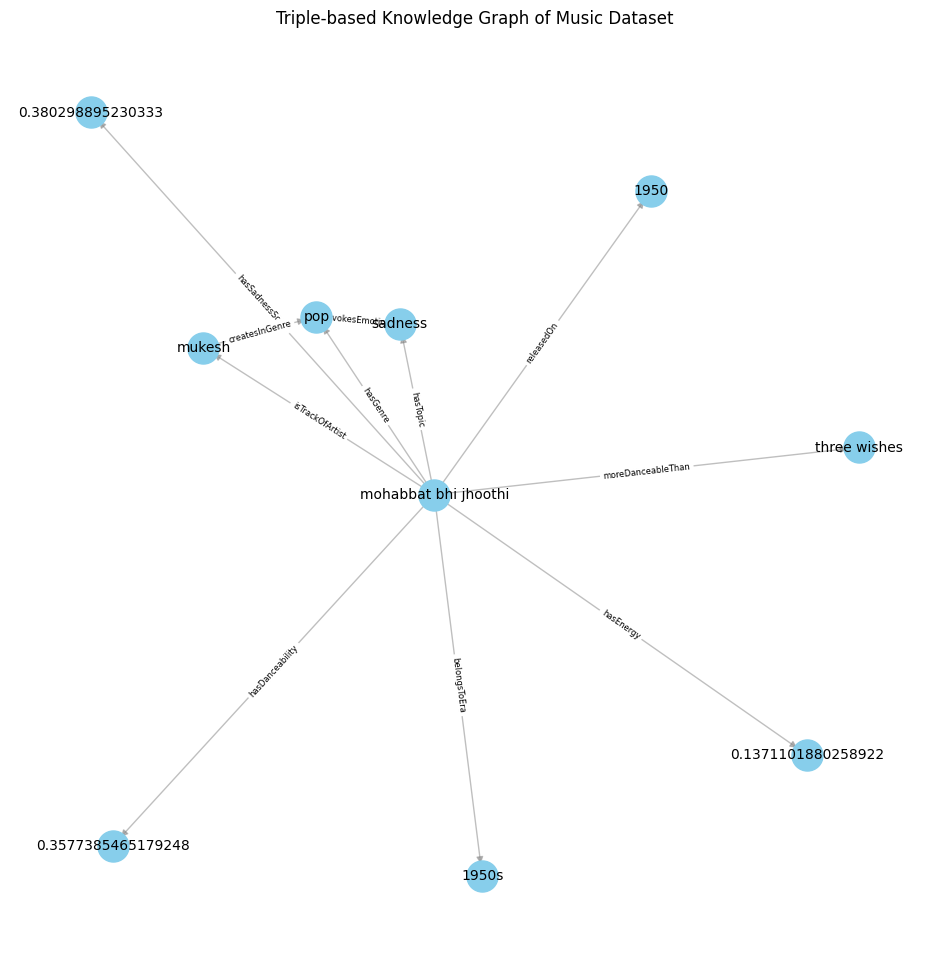

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–Ω—ã–π –≥—Ä–∞—Ñ
G = nx.DiGraph()
predicates = []

# –î–æ–±–∞–≤–ª—è–µ–º —É–∑–ª—ã –∏ —Ä–µ–±—Ä–∞ –Ω–∞ –æ—Å–Ω–æ–≤–µ —Ç—Ä–∏–ø–ª–µ—Ç–æ–≤
for triple in triples[:20]:
    subject, predicate, object_ = triple

    # –î–æ–±–∞–≤–ª—è–µ–º —É–∑–ª—ã –¥–ª—è —Å—É–±—ä–µ–∫—Ç–∞ –∏ –æ–±—ä–µ–∫—Ç–∞, –µ—Å–ª–∏ –æ–Ω–∏ –µ—â–µ –Ω–µ –≤ –≥—Ä–∞—Ñ–µ
    if predicate in predicates:
      continue
    if subject not in G:
        G.add_node(subject)
    if object_ not in G:
        G.add_node(object_)

    # –î–æ–±–∞–≤–ª—è–µ–º —Ä–µ–±—Ä–æ –º–µ–∂–¥—É —Å—É–±—ä–µ–∫—Ç–æ–º –∏ –æ–±—ä–µ–∫—Ç–æ–º —Å –ø—Ä–µ–¥–∏–∫–∞—Ç–æ–º –∫–∞–∫ –º–µ—Ç–∫–æ–π —Ä–µ–±—Ä–∞
    predicates.append(predicate)
    G.add_edge(subject, object_, label=predicate)

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ä–∞–∑–º–µ—Ç–∫—É –¥–ª—è –ª—É—á—à–µ–π –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
pos = nx.spring_layout(G, seed=42)  # –†–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ —É–∑–ª–æ–≤ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –ø—Ä—É–∂–∏–Ω–Ω–æ–π —Ä–∞–∑–º–µ—Ç–∫–∏

# –†–∏—Å—É–µ–º –≥—Ä–∞—Ñ
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue')
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1.0, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['label'] for u, v, d in G.edges(data=True)}, font_size=6)

# –û—Ç–æ–±—Ä–∞–∂–∞–µ–º –≥—Ä–∞—Ñ
plt.title("–ì—Ä–∞—Ñ –∑–Ω–∞–Ω–∏–π –Ω–∞ –æ—Å–Ω–æ–≤–µ —Ç—Ä–∏–ø–ª–µ—Ç–æ–≤ –∏–∑ –º—É–∑—ã–∫–∞–ª—å–Ω–æ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö")
plt.axis("off")  # –°–∫—Ä—ã—Ç—å –æ—Å–∏
plt.show()

In [ ]:
# –°–æ–∑–¥–∞–µ–º DataFrame –∏–∑ —Å–ø–∏—Å–∫–∞ —Ç—Ä–∏–ø–ª–µ—Ç–æ–≤
# –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –Ω–∞–∑–≤–∞–Ω–∏—è –∫–æ–ª–æ–Ω–æ–∫ –∫–∞–∫ "subject", "predicate" –∏ "object"
triples_df = pd.DataFrame(triples, columns=["subject", "predicate", "object"])

# –§–∏–ª—å—Ç—Ä—É–µ–º DataFrame –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è —Ç–æ–ª—å–∫–æ —Ç–µ—Ö —Å—Ç—Ä–æ–∫, –≥–¥–µ
# –ª–∏–±–æ "subject" —Ä–∞–≤–Ω–æ "mohabbat bhi jhoothi",
# –ª–∏–±–æ "object" —Ä–∞–≤–Ω–æ "mukesh"
filtered_triples = triples_df[(triples_df.subject == "mohabbat bhi jhoothi") | (triples_df.object == "mukesh")]

# –ü–æ–∫–∞–∑–∞—Ç—å –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
filtered_triples

subject          predicate  \
0           mohabbat bhi jhoothi  moreDanceableThan   
1           mohabbat bhi jhoothi  moreDanceableThan   
2           mohabbat bhi jhoothi  moreDanceableThan   
3           mohabbat bhi jhoothi  moreDanceableThan   
4           mohabbat bhi jhoothi    isTrackOfArtist   
5           mohabbat bhi jhoothi           hasGenre   
6           mohabbat bhi jhoothi         releasedOn   
7           mohabbat bhi jhoothi    hasSadnessScore   
8           mohabbat bhi jhoothi          hasEnergy   
9           mohabbat bhi jhoothi    hasDanceability   
10          mohabbat bhi jhoothi           hasTopic   
11          mohabbat bhi jhoothi       belongsToEra   
14          mohabbat bhi jhoothi     invokesEmotion   
2496  hum tujhse mohabbat kar ke    isTrackOfArtist   
2735    raat andheri door savera    isTrackOfArtist   

                                                 object  
0                                          three wishes  
1                                          just for fun  
2     absence makes the heart grow fonder (for someb...  
3                       vieni su (say you love me, too)  
4                                                mukesh  
5                                                   pop  
6                                                  1950  
7                                              0.380299  
8                                               0.13711  
9                                              0.357739  
10                                              sadness  
11                                                1950s  
14                                              sadness  
2496                                             mukesh  
2735                                             mukesh

## –¢—Ä–µ–Ω–∏—Ä–æ–≤–∫–∞ —ç–º–±–µ–¥–∏–Ω–≥–æ–≤ –≤ –≥—Ä–∞—Ñ–µ –∑–Ω–∞–Ω–∏–π

In [ ]:
from ampligraph.evaluation import train_test_split_no_unseen

X_train, X_valid = train_test_split_no_unseen(np.array(triples), test_size=10000)

In [ ]:
print('Train set size: ', X_train.shape)
print('Test set size: ', X_valid.shape)

Train set size:  (376602, 3)
Test set size:  (10000, 3)


In [ ]:
from ampligraph.latent_features import ScoringBasedEmbeddingModel
from ampligraph.latent_features.loss_functions import get as get_loss
from ampligraph.latent_features.regularizers import get as get_regularizer

# –°–æ–∑–¥–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏
model = ScoringBasedEmbeddingModel(k=100,
                                   eta=20,
                                   scoring_type='ComplEx',
                                   seed=0)

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞, —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –∏ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ç–æ—Ä–∞
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
loss = get_loss('multiclass_nll')
regularizer = get_regularizer('LP', {'p': 3, 'lambda': 1e-5})

# –ö–æ–º–ø–∏–ª—è—Ü–∏—è –º–æ–¥–µ–ª–∏
model.compile(optimizer=optimizer, loss=loss, entity_relation_regularizer=regularizer)

AmpliGraph —Ä–µ–∞–ª–∏–∑–æ–≤–∞–ª –Ω–µ—Å–∫–æ–ª—å–∫–æ –º–æ–¥–µ–ª–µ–π –≤—Å—Ç—Ä–∞–∏–≤–∞–Ω–∏—è –≥—Ä–∞—Ñ–æ–≤ –∑–Ω–∞–Ω–∏–π (TransE, ComplEx, DistMult, HolE), –Ω–æ –¥–ª—è –Ω–∞—á–∞–ª–∞ –º—ã –ø—Ä–æ—Å—Ç–æ —Å–æ–±–∏—Ä–∞–µ–º—Å—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Å–ª–æ–∂–Ω—É—é –º–æ–¥–µ–ª—å, –∫–æ—Ç–æ—Ä–∞—è, –∫–∞–∫ –∏–∑–≤–µ—Å—Ç–Ω–æ, –æ–±–ª–∞–¥–∞–µ—Ç —Å–∞–º—ã–º–∏ —Å–æ–≤—Ä–µ–º–µ–Ω–Ω—ã–º–∏ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—è–º–∏ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è.

–í—ã–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –±—ã–ª –æ—Å–Ω–æ–≤–∞–Ω –Ω–∞ –Ω–∞–∏–ª—É—á—à–∏—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞—Ö, –∫–æ—Ç–æ—Ä—ã–µ –º—ã –Ω–∞—à–ª–∏ –Ω–∞ –¥–∞–Ω–Ω—ã–π –º–æ–º–µ–Ω—Ç –¥–ª—è –∫–æ–º–ø–ª–µ–∫—Å–Ω–æ–π –º–æ–¥–µ–ª–∏, –ø—Ä–∏–º–µ–Ω—è–µ–º–æ–π –∫ –Ω–µ–∫–æ—Ç–æ—Ä—ã–º –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω—ã–º –Ω–∞–±–æ—Ä–∞–º –¥–∞–Ω–Ω—ã—Ö, –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã–º —Å–æ–æ–±—â–µ—Å—Ç–≤–æ–º –ø–æ –≤—Å—Ç—Ä–∞–∏–≤–∞–Ω–∏—é –≥—Ä–∞—Ñ–æ–≤ –∑–Ω–∞–Ω–∏–π. –í —ç—Ç–æ–º —Ä—É–∫–æ–≤–æ–¥—Å—Ç–≤–µ –Ω–µ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ—Ç—Å—è –Ω–∞—Å—Ç—Ä–æ–π–∫–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤.

–î–∞–≤–∞–π—Ç–µ –ø—Ä–æ–π–¥–µ–º—Å—è –ø–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º, —á—Ç–æ–±—ã –ø–æ–Ω—è—Ç—å, —á—Ç–æ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç:

k: —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞ –≤–ª–æ–∂–µ–Ω–∏—è.

eta ( eta ) : –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –∏–ª–∏ –ª–æ–∂–Ω—ã—Ö —Ç—Ä–∏–ø–ª–µ—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω—ã –≤–æ –≤—Ä–µ–º—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –æ–±—É—á–µ–Ω–∏—è –¥–ª—è –∫–∞–∂–¥–æ–π –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–π –∏–ª–∏ –∏—Å—Ç–∏–Ω–Ω–æ–π —Ç—Ä–∏–ø–ª–µ—Ç–æ–≤.

scoring_type: —Ç–∏–ø –º–æ–¥–µ–ª–∏, –æ–ø—Ä–µ–¥–µ–ª—è–µ–º—ã–π –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–µ–π –ø–æ–¥—Å—á–µ—Ç–∞ –æ—á–∫–æ–≤.

seed: —Å–ª—É—á–∞–π–Ω–æ–µ –Ω–∞—á–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ, –∏—Å–ø–æ–ª—å–∑—É–µ–º–æ–µ –¥–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏.

optimizer: –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä Adam —Å–æ —Å–∫–æ—Ä–æ—Å—Ç—å—é –æ–±—É—á–µ–Ω–∏—è 1e-4, –∑–∞–¥–∞–≤–∞–µ–º–æ–π —Å –ø–æ–º–æ—â—å—é –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ kwarg optimizer_params.

loss : –ø–æ–ø–∞—Ä–Ω—ã–π –ø—Ä–æ–∏–≥—Ä—ã—à —Å –∑–∞–ø–∞—Å–æ–º –≤ 0,5, —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–Ω—ã–º —Å –ø–æ–º–æ—â—å—é –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ loss_params kwarg.

regularizer : —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è Lp —Å p = 3 , —Ç.–µ. –†–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è l3.  –ª—è–º–±–¥–∞ = 1e-5, –∑–∞–¥–∞–µ—Ç—Å—è —Å –ø–æ–º–æ—â—å—é –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ regularizer_params kwarg.

–í–ê–†–ù–ò–ù–ì: —Ç—Ä–µ–Ω–∏—Ä–æ–≤–∫–∞ –∑–∞–π–º—ë—Ç –æ–∫–æ–ª–æ 10 –º–∏–Ω—É—Ç –Ω–∞ —Å–æ–≤—Ä–µ–º–µ–Ω–Ω–æ–º –¶–ü–£

In [ ]:
model.fit(X_train,
          batch_size=int(X_train.shape[0] / 50),
          epochs=20,  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö –æ–±—É—á–µ–Ω–∏—è
          verbose=True  # –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä–∞ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è.
          )

Epoch 1/20
52/52 [==============================] - 45s 856ms/step - loss: 22481.6406
Epoch 2/20
52/52 [==============================] - 45s 873ms/step - loss: 22480.9316
Epoch 3/20
52/52 [==============================] - 46s 882ms/step - loss: 22479.4277
Epoch 4/20
52/52 [==============================] - 43s 819ms/step - loss: 22476.6035
Epoch 5/20
52/52 [==============================] - 48s 914ms/step - loss: 22471.8672
Epoch 6/20
52/52 [==============================] - 48s 921ms/step - loss: 22464.5391
Epoch 7/20
52/52 [==============================] - 42s 808ms/step - loss: 22453.8750
Epoch 8/20
52/52 [==============================] - 46s 880ms/step - loss: 22439.0801
Epoch 9/20
52/52 [==============================] - 44s 851ms/step - loss: 22419.3691
Epoch 10/20
52/52 [==============================] - 71s 1s/step - loss: 22393.9961
Epoch 11/20
52/52 [==============================] - 42s 807ms/step - loss: 22362.2324
Epoch 12/20
52/52 [==============================] - 44

## –ü—Ä–æ–≤–µ—Ä–∫–∞ —ç–º–±–µ–¥–∏–Ω–≥–æ–≤

AmpliGraph —Å—Ç—Ä–µ–º–∏—Ç—Å—è —Å–ª–µ–¥–æ–≤–∞—Ç—å —Ñ–∏–ª–æ—Å–æ—Ñ–∏–∏ –¥–∏–∑–∞–π–Ω–∞ scikit-learn, –æ—Å–Ω–æ–≤–∞–Ω–Ω–æ–π –Ω–∞ –ø—Ä–æ—Å—Ç–æ—Ç–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è, –∏ —É–ø—Ä–æ—â–∞—Ç—å –≤—Å–µ –≤–ø–ª–æ—Ç—å –¥–æ —Ñ—É–Ω–∫—Ü–∏–π "–ø–æ–¥–≥–æ–Ω–∫–∏", "–æ—Ü–µ–Ω–∫–∏" –∏ "–ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è".

–¢–µ–º –Ω–µ –º–µ–Ω–µ–µ, –º—ã –¥–æ–ª–∂–Ω—ã –ø—Ä–µ–¥–ø—Ä–∏–Ω—è—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ —à–∞–≥–∏, —Å–≤—è–∑–∞–Ω–Ω—ã–µ —Å –≥—Ä–∞—Ñ–æ–º –∑–Ω–∞–Ω–∏–π, —á—Ç–æ–±—ã –æ–±–µ—Å–ø–µ—á–∏—Ç—å –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ –∏ –æ—Ü–µ–Ω–∫—É –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏. –ü–µ—Ä–≤—ã–π –∏–∑ –Ω–∏—Ö - —ç—Ç–æ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ñ–∏–ª—å—Ç—Ä–∞, –∫–æ—Ç–æ—Ä—ã–π –±—É–¥–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –¥–ª—è –æ–±–µ—Å–ø–µ—á–µ–Ω–∏—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –Ω–∏–∫–∞–∫–∏–µ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ —É—Ç–≤–µ—Ä–∂–¥–µ–Ω–∏—è, —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –ø—Ä–æ—Ü–µ–¥—É—Ä—ã –ø—Ä–æ–≤–µ—Ä–∫–∏ –Ω–∞ –∫–æ—Ä—Ä—É–ø—Ü–∏—é, –Ω–∞ —Å–∞–º–æ–º –¥–µ–ª–µ –Ω–µ –±—ã–ª–∏ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–º–∏. –≠—Ç–æ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å, –ø—Ä–æ—Å—Ç–æ –æ–±—ä–µ–¥–∏–Ω–∏–≤ –Ω–∞—à–∏ –æ–±—É—á–∞—é—â–∏–µ –∏ —Ç–µ—Å—Ç–æ–≤—ã–µ –Ω–∞–±–æ—Ä—ã. –¢–µ–ø–µ—Ä—å, –∫–æ–≥–¥–∞ —Å—Ç—Ä–∞—Ç–µ–≥–∏—è –∏—Å–∫–∞–∂–µ–Ω–∏—è –≥–µ–Ω–µ—Ä–∏—Ä—É–µ—Ç –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ —Ç—Ä–æ–π–∫–∏, –º—ã –º–æ–∂–µ–º –ø—Ä–æ–≤–µ—Ä–∏—Ç—å, —á—Ç–æ –æ–Ω–∏ –Ω–∞ —Å–∞–º–æ–º –¥–µ–ª–µ –Ω–µ —è–≤–ª—è—é—Ç—Å—è –∏—Å—Ç–∏–Ω–Ω—ã–º–∏ —É—Ç–≤–µ—Ä–∂–¥–µ–Ω–∏—è–º–∏.

–î–ª—è —ç—Ç–æ–≥–æ –º—ã –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–µ—Ç–æ–¥ `evaluate` –æ–±—ä–µ–∫—Ç–∞ model:

- **`X_valid`** - –¥–∞–Ω–Ω—ã–µ –¥–ª—è –æ—Ü–µ–Ω–∫–∏. –ú—ã —Å–æ–±–∏—Ä–∞–µ–º—Å—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –Ω–∞—à —Ç–µ—Å—Ç–æ–≤—ã–π –Ω–∞–±–æ—Ä –¥–ª—è –æ—Ü–µ–Ω–∫–∏.
- **`use_filter`** - –±—É–¥–µ—Ç –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤—ã–≤–∞—Ç—å –ª–æ–∂–Ω–æ–æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã, –≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º—ã–µ —Å—Ç—Ä–∞—Ç–µ–≥–∏–µ–π –∫–æ—Ä—Ä—É–ø—Ü–∏–∏.
- **`corrupt_side"** - –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç –ø–æ–¥—Ö–æ–¥ –∫ —Ç—Ä–æ–π–Ω–æ–π –∫–æ—Ä—Ä—É–ø—Ü–∏–∏. –ø–∞—Ä–∞–º–µ—Ç—Ä "s,o" –æ–∑–Ω–∞—á–∞–µ—Ç –∑–Ω–∞—á–µ–Ω–∏–µ "True", —Ç–æ–≥–¥–∞ subj –∏ obj –±—É–¥—É—Ç –ø–æ–≤—Ä–µ–∂–¥–µ–Ω—ã –æ—Ç–¥–µ–ª—å–Ω–æ –≤–æ –≤—Ä–µ–º—è –æ—Ü–µ–Ω–∫–∏.
- **"verbose"** - –æ—Ç–æ–±—Ä–∞–∂–∞–µ—Ç –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è.

In [ ]:
# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö
ranks = model.evaluate(
    X_valid,
    use_filter={'train': X_train, 'test': X_valid},  # –§–∏–ª—å—Ç—Ä—É–µ–º –ø–æ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã–º —Ç—Ä–∏–ø–ª–µ—Ç–∞–º
    corrupt_side='s,o',  # –£–∫–∞–∑—ã–≤–∞–µ–º, —á—Ç–æ –∫–æ—Ä—Ä—É–º–ø–∏—Ä–æ–≤–∞—Ç—å –±—É–¥–µ–º —Å—É–±—ä–µ–∫—Ç –∏ –æ–±—ä–µ–∫—Ç
    verbose=True  # –í–∫–ª—é—á–∞–µ–º –≤—ã–≤–æ–¥ –ø—Ä–æ–≥—Ä–µ—Å—Å–∞ –Ω–∞ —ç–∫—Ä–∞–Ω
)

1001/1001 [==============================] - 294s 294ms/step


–ú—ã —Å–æ–±–∏—Ä–∞–µ–º—Å—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏–∏ mrr_score (—Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –≤–∑–∞–∏–º–Ω–æ–≥–æ —Ä–∞–Ω–∂–∏—Ä–æ–≤–∞–Ω–∏—è) –∏ hits_at_n_score.

- **mrr_score**: –§—É–Ω–∫—Ü–∏—è –≤—ã—á–∏—Å–ª—è–µ—Ç —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –≤–∑–∞–∏–º–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤–µ–∫—Ç–æ—Ä–∞ —Ä–∞–Ω–≥–æ–≤ —Ä–µ–π—Ç–∏–Ω–≥–∞.
- **hits_at_n_score**: –§—É–Ω–∫—Ü–∏—è –≤—ã—á–∏—Å–ª—è–µ—Ç, —Å–∫–æ–ª—å–∫–æ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤–µ–∫—Ç–æ—Ä–∞ —Ä–µ–π—Ç–∏–Ω–≥–æ–≤—ã—Ö —Ä–∞–Ω–≥–æ–≤ –ø–æ–ø–∞–¥–∞—é—Ç –Ω–∞ –≤–µ—Ä—Ö–Ω–∏–µ n –ø–æ–∑–∏—Ü–∏–π.

In [ ]:
from ampligraph.evaluation import mr_score, mrr_score, hits_at_n_score

# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ —Å—Ä–µ–¥–Ω–µ–≥–æ —Ä–∞–Ω–≥–∞ (Mean Rank, MR)
mr = mr_score(ranks)

# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ —Å—Ä–µ–¥–Ω–µ–≥–æ –æ–±—Ä–∞—Ç–Ω–æ–≥–æ —Ä–∞–Ω–≥–∞ (Mean Reciprocal Rank, MRR)
mrr = mrr_score(ranks)

# –í—ã–≤–æ–¥ —Å—Ä–µ–¥–Ω–æ–≥–æ –æ–±—Ä–∞—Ç–Ω–æ–≥–æ —Ä–∞–Ω–≥–∞
print("MRR: %.2f" % mrr)

# –í—ã–≤–æ–¥ —Å—Ä–µ–¥–Ω–µ–≥–æ —Ä–∞–Ω–≥–∞
print("MR: %.2f" % mr)

# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ Hits@10 - –ø—Ä–æ—Ü–µ–Ω—Ç —Å–ª—É—á–∞–µ–≤, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –ø—Ä–∞–≤–∏–ª—å–Ω—ã–µ –æ—Ç–≤–µ—Ç—ã
# –ø–æ–ø–∞–¥–∞—é—Ç –≤ —Ç–æ–ø-10 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö
hits_10 = hits_at_n_score(ranks, n=10)
print("Hits@10: %.2f" % hits_10)

# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ Hits@3
hits_3 = hits_at_n_score(ranks, n=3)
print("Hits@3: %.2f" % hits_3)

# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ Hits@1
hits_1 = hits_at_n_score(ranks, n=1)
print("Hits@1: %.2f" % hits_1)

MRR: inf
MR: 4976.97
Hits@10: 0.27
Hits@3: 0.22
Hits@1: 0.16


–ú—ã –º–æ–∂–µ–º –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å —ç—Ç–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã, —É—Ç–≤–µ—Ä–∂–¥–∞—è, —á—Ç–æ –º–æ–¥–µ–ª—å –≤ 34% —Å–ª—É—á–∞–µ–≤ –æ—Ç–Ω–æ—Å–∏—Ç –ø—Ä–∞–≤–∏–ª—å–Ω—ã–π –æ–±—ä–µ–∫—Ç –∫ —Ç–æ–ø-3 –≤–æ–∑–º–æ–∂–Ω—ã—Ö –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤.

–°–∞–º–∏—Ö –ø–æ —Å–µ–±–µ —ç—Ç–∏—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ, —á—Ç–æ–±—ã —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥ –æ –ø–æ–ª–µ–∑–Ω–æ—Å—Ç–∏ –≤—Å—Ç—Ä–∞–∏–≤–∞–Ω–∏–π –≤ –ø–æ—Å–ª–µ–¥—É—é—â—É—é –∑–∞–¥–∞—á—É, –Ω–æ –æ–Ω–∏ –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞—é—Ç, —á—Ç–æ –≤—Å—Ç—Ä–∞–∏–≤–∞–Ω–∏—è —É—Å–≤–æ–∏–ª–∏ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ä–∞–∑—É–º–Ω–æ–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ, —á—Ç–æ–±—ã —Ä–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –∏—Ö –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –≤ –±–æ–ª—å—à–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ –∑–∞–¥–∞—á.

## –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è –∏ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —ç–º–±–µ–¥–∏–Ω–≥–æ–≤

–ß—Ç–æ–±—ã –æ—Ü–µ–Ω–∏—Ç—å —Å—É–±—ä–µ–∫—Ç–∏–≤–Ω–æ–µ –∫–∞—á–µ—Å—Ç–≤–æ –≤–ª–æ–∂–µ–Ω–∏–π, –º—ã –º–æ–∂–µ–º –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –≤–ª–æ–∂–µ–Ω–∏—è –≤ –¥–≤—É–º–µ—Ä–Ω–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ, –∞ —Ç–∞–∫–∂–µ —Å–≥—Ä—É–ø–ø–∏—Ä–æ–≤–∞—Ç—å –∏—Ö –≤ –∏—Å—Ö–æ–¥–Ω–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ. –ú—ã –º–æ–∂–µ–º —Å—Ä–∞–≤–Ω–∏—Ç—å –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–æ–≤–∞–Ω–Ω—ã–µ –≤–ª–æ–∂–µ–Ω–∏—è —Å –µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω—ã–º–∏ –∫–ª–∞—Å—Ç–µ—Ä–∞–º–∏, –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ —Å –∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç–æ–º, –æ—Ç–∫—É–¥–∞ —Ä–æ–¥–æ–º –∫–æ–º–∞–Ω–¥–∞, —á—Ç–æ–±—ã —É –Ω–∞—Å –±—ã–ª–∞ –æ—Å–Ω–æ–≤–∞ –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –∫–∞–∫ –≤ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–º, —Ç–∞–∫ –∏ –≤ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–º –æ—Ç–Ω–æ—à–µ–Ω–∏–∏.

In [ ]:
%pip install adjustText
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
%matplotlib inline

In [ ]:
# –°–æ–∑–¥–∞–µ–º —Å–ª–æ–≤–∞—Ä—å, —Å–æ–ø–æ—Å—Ç–∞–≤–ª—è—é—â–∏–π —Ç—Ä–µ–∫ —Å –∂–∞–Ω—Ä–æ–º
track_to_genre_map = {**dict(zip(df.track_name, df.genre))}

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –∂–∞–Ω—Ä–∞ –ø–æ –Ω–∞–∑–≤–∞–Ω–∏—é —Ç—Ä–µ–∫–∞
def map_track_to_genre(track_name):
    return track_to_genre_map.get(track_name, None)  # –ò—Å–ø–æ–ª—å–∑—É–µ–º get –¥–ª—è –±–µ–∑–æ–ø–∞—Å–Ω–æ–≥–æ –∏–∑–≤–ª–µ—á–µ–Ω–∏—è –∂–∞–Ω—Ä–∞

–°–æ–∑–¥–∞–µ–º —Å–ª–æ–≤–∞—Ä—å —Å —ç–º–±–µ–¥–¥–∏–Ω–≥–∞–º–∏ –≤—Å–µ—Ö –∫–æ–º–∞–Ω–¥:


In [ ]:
# –ü–æ–ª—É—á–∞–µ–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∏–º–µ–Ω–∞ —Ç—Ä–µ–∫–æ–≤ –∏–∑ –æ–±—É—á–∞—é—â–µ–≥–æ –Ω–∞–±–æ—Ä–∞
tracks = df.track_name[df["train"]].unique()

# –ü–æ–ª—É—á–µ–Ω–∏–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ –¥–ª—è –≤—Å–µ—Ö —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ç—Ä–µ–∫–æ–≤
track_embeddings = dict(zip(tracks, model.get_embeddings(tracks)))

–ò—Å–ø–æ–ª—å–∑—É–µ–º –º–µ—Ç–æ–¥ PCA –¥–ª—è –ø—Ä–æ–µ–∫—Ü–∏–∏ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ –∏–∑ 200-–º–µ—Ä–Ω–æ–≥–æ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞ –≤ 2D-–ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ:


In [ ]:
# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ —Ç—Ä–µ–∫–æ–≤ –≤ –¥–≤—É–º–µ—Ä–Ω–æ–µ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º PCA
embeddings_2d = PCA(n_components=2).fit_transform(np.array([i for i in track_embeddings.values()]))

–ö–ª–∞—Å—Ç–µ—Ä–∏–∑—É–µ–º —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ –∫–æ–º–∞–Ω–¥ –≤ –∏—Ö –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω–æ–º 200-–º–µ—Ä–Ω–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ –∏—Å–ø–æ–ª—å–∑—É—è –º–µ—Ç–æ–¥ find_clusters –∏–∑ –Ω–∞—à–µ–≥–æ Discovery API:


In [ ]:
from ampligraph.discovery import find_clusters
from sklearn.cluster import KMeans

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –∞–ª–≥–æ—Ä–∏—Ç–º –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ K-Means
clustering_algorithm = KMeans(
    n_clusters=6,  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤, –Ω–∞ –∫–æ—Ç–æ—Ä—ã–µ –º—ã —Ö–æ—Ç–∏–º –ø–æ–¥–µ–ª–∏—Ç—å –¥–∞–Ω–Ω—ã–µ
    n_init=50,     # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –Ω–∞—á–∞–ª—å–Ω—ã—Ö –∫–æ–Ω—Ñ–∏–≥—É—Ä–∞—Ü–∏–π
    max_iter=500,  # –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ –∏—Ç–µ—Ä–∞—Ü–∏–π –¥–ª—è –æ–¥–Ω–æ–≥–æ –∑–∞–ø—É—Å–∫–∞ –∞–ª–≥–æ—Ä–∏—Ç–º–∞
    random_state=0 # –§–∏–∫—Å–∏—Ä—É–µ–º –Ω–∞—á–∞–ª—å–Ω–æ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ –¥–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
)

# –ù–∞—Ö–æ–¥–∏–º –∫–ª–∞—Å—Ç–µ—Ä—ã –¥–ª—è —Ç—Ä–µ–∫–æ–≤ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ –∏ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏
clusters = find_clusters(
    tracks,            # –°–ø–∏—Å–æ–∫ —Ç—Ä–µ–∫–æ–≤ –¥–ª—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏
    model,             # –û–±—É—á–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å, –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è—é—â–∞—è —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ –¥–ª—è —Ç—Ä–µ–∫–æ–≤
    clustering_algorithm,  # –ê–ª–≥–æ—Ä–∏—Ç–º –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏
    mode='e'           # –£–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è –¥–æ–ª–∂–Ω–∞ –≤—ã–ø–æ–ª–Ω—è—Ç—å—Å—è –≤ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ
)

DataFrame —Å–æ–¥–µ—Ä–∂–∏—Ç –¥–ª—è –∫–∞–∂–¥–æ–π –∫–æ–º–∞–Ω–¥—ã –∏—Ö –ø—Ä–æ–µ—Ü–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ –≤ 2D-–ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ —á–µ—Ä–µ–∑ PCA, –∏—Ö –∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç –∏ –∫–ª–∞—Å—Ç–µ—Ä KMeans. –ò—Å–ø–æ–ª—å–∑—É–µ–º —ç—Ç–æ –≤–º–µ—Å—Ç–µ —Å Seaborn –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–π.


In [ ]:
# –°–æ–∑–¥–∞–µ–º DataFrame –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏, –≤–∫–ª—é—á–∞—é—â–∏–π —Ç—Ä–µ–∫–∏ –∏ –∏—Ö –¥–≤—É–º–µ—Ä–Ω—ã–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–∏,
# –∞ —Ç–∞–∫–∂–µ –∂–∞–Ω—Ä—ã –∏ –∫–ª–∞—Å—Ç–µ—Ä—ã, –∫ –∫–æ—Ç–æ—Ä—ã–º –æ–Ω–∏ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–∞—Ç
plot_df = pd.DataFrame({
    "tracks": tracks,  # –ò–º–µ–Ω–∞ —Ç—Ä–µ–∫–æ–≤
    "embedding1": embeddings_2d[:, 0],  # –ü–µ—Ä–≤–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ –¥–≤—É–º–µ—Ä–Ω—ã—Ö —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤
    "embedding2": embeddings_2d[:, 1],  # –í—Ç–æ—Ä–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ –¥–≤—É–º–µ—Ä–Ω—ã—Ö —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤
    "genre": pd.Series(tracks).apply(map_track_to_genre),  # –ñ–∞–Ω—Ä –∫–∞–∂–¥–æ–≥–æ —Ç—Ä–µ–∫–∞
    "cluster": "cluster" + pd.Series(clusters).astype(str)  # –ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –∫–ª–∞—Å—Ç–µ—Ä–∞ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Ç—Ä–µ–∫–∞, —Å –ø—Ä–µ—Ñ–∏–∫—Å–æ–º "cluster"
})

–û—Ç–æ–±—Ä–∞–∂–∞–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –Ω–∞ 2D-–¥–∏–∞–≥—Ä–∞–º–º–µ —Ä–∞—Å—Å–µ–∏–≤–∞–Ω–∏—è, —Ä–∞—Å–∫—Ä–∞—à–∏–≤–∞—è –∫–æ–º–∞–Ω–¥—ã –ø–æ –∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç–∞–º –∏–ª–∏ –∫–ª–∞—Å—Ç–µ—Ä–∞–º –∏ –≤—ã–≤–æ–¥–∏–º –Ω–∞–∑–≤–∞–Ω–∏—è –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –æ—Ç–¥–µ–ª—å–Ω—ã—Ö –∫–æ–º–∞–Ω–¥.

–û—Ç–æ–±—Ä–∞–∂–∞–µ–º –Ω–∞–∑–≤–∞–Ω–∏—è —Ç–æ–ø-20 –∫–æ–º–∞–Ω–¥ (—Å–æ–≥–ª–∞—Å–Ω–æ —Ä–µ–π—Ç–∏–Ω–≥—É FIFA) –∏ —Å–ª—É—á–∞–π–Ω—ã–π –ø–æ–¥–Ω–∞–±–æ—Ä –æ—Å—Ç–∞–ª—å–Ω—ã—Ö.


In [ ]:
# –°–ø–∏—Å–æ–∫ –∏–∑ 20 –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö —Ç—Ä–µ–∫–æ–≤
top20tracks = [
    "i believe", "mohabbat bhi jhoothi", "cry", "patricia", "apopse eida oneiro",
    "it's not for me to say", "klapse me mana klapse me", "finito la mouzika",
    "carolina moon", "necessary evil", "chicken reel", "blue skies", "dark eyes",
    "sleep", "love me", "blue christmas", "right now!", "granada", "moonglow", "rock house"
]

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ —Å –≤—ã–¥–µ–ª–µ–Ω–∏–µ–º
def plot_clusters(hue):
    np.random.seed(0)  # –§–∏–∫—Å–∏—Ä—É–µ–º —Å–∏–¥ –¥–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏ —Å–ª—É—á–∞–π–Ω—ã—Ö —á–∏—Å–µ–ª
    plt.figure(figsize=(12, 12))  # –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º —Ä–∞–∑–º–µ—Ä —Ñ–∏–≥—É—Ä—ã
    plt.title("{} embeddings".format(hue).capitalize())  # –ó–∞–≥–æ–ª–æ–≤–æ–∫ –≥—Ä–∞—Ñ–∏–∫–∞

    # –°–æ–∑–¥–∞–µ–º scatter plot —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º seaborn
    ax = sns.scatterplot(data=plot_df, x="embedding1", y="embedding2", hue=hue, palette="viridis", alpha=0.7, edgecolor=None)

    texts = []  # –°–ø–∏—Å–æ–∫ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö —ç–∫–∑–µ–º–ø–ª—è—Ä–æ–≤
    limit = 0
    for i, point in plot_df.iterrows():
        if limit > 1000:  # –û–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ –Ω–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–¥–ø–∏—Å—ã–≤–∞–µ–º—ã—Ö —Ç–æ—á–µ–∫
            break
        if point["tracks"] in top20tracks:
            # –î–æ–±–∞–≤–ª—è–µ–º –ø–æ–¥–ø–∏—Å—å —Ç–æ–ª—å–∫–æ –¥–ª—è –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö —Ç—Ä–µ–∫–æ–≤
            texts.append(plt.text(point['embedding1'] + 0.02, point['embedding2'] + 0.01, str(point["tracks"])))
        limit += 1

    adjust_text(texts, arrowprops=dict(arrowstyle="->", color='red', linewidth=0.5))  # –ö–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∫–∞ —Ä–∞–∑–º–µ—â–µ–Ω–∏—è —Ç–µ–∫—Å—Ç–∞
    plt.show()  # –û—Ç–æ–±—Ä–∞–∂–∞–µ–º –≥—Ä–∞—Ñ–∏–∫

–ü–µ—Ä–≤–∞—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è 2D-—ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –≥–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∏–µ –∫–ª–∞—Å—Ç–µ—Ä—ã, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–∂–Ω–æ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å –∫–∞–∫ —Ñ–æ—Ä–º—É "–∏—Å—Ç–∏–Ω–Ω–æ–π" –∫–∞—Ä—Ç–∏–Ω—ã:

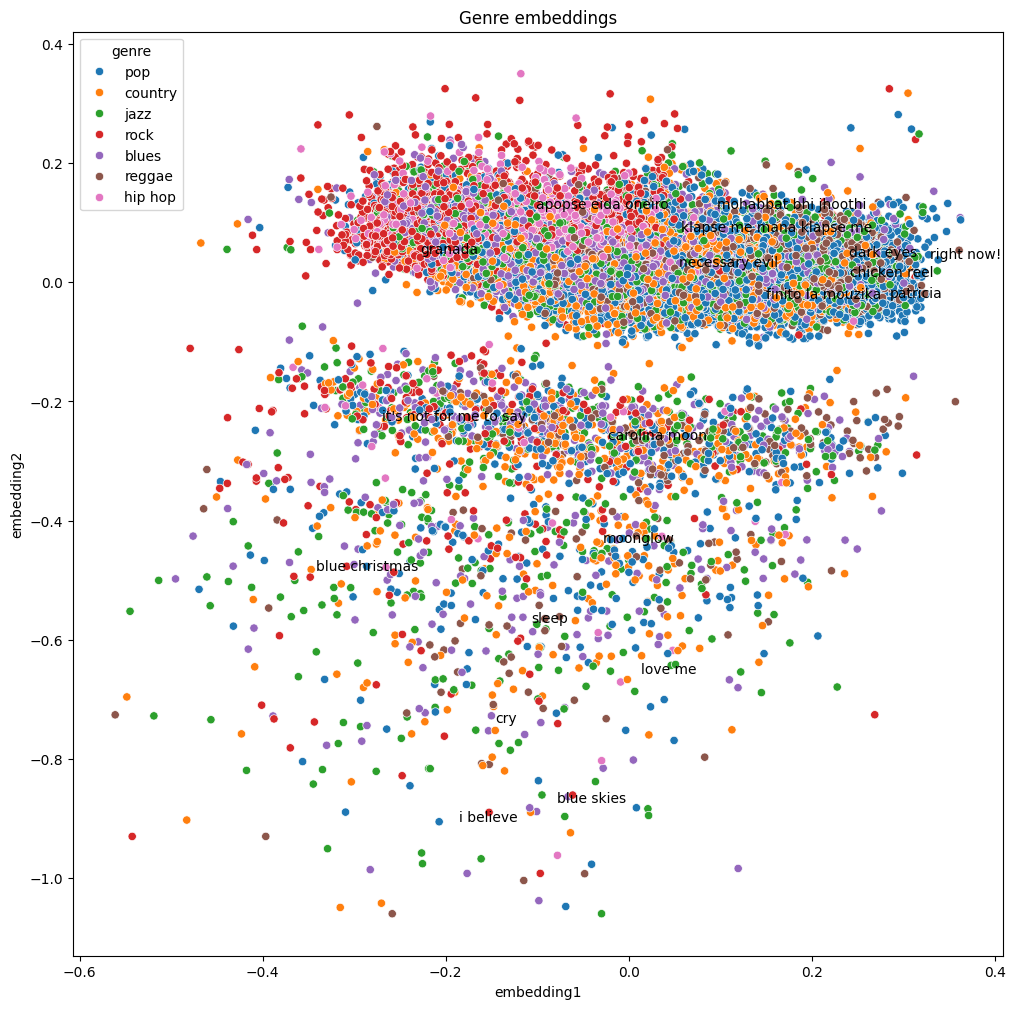

In [ ]:
plot_clusters("genre")

–í–∏–¥–∏–º, —á—Ç–æ —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ –≤—ã—è–≤–∏–ª–∏ –≥–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∏–µ —Å—Ö–æ–¥—Å—Ç–≤–∞, –¥–∞–∂–µ –Ω–µ—Å–º–æ—Ç—Ä—è –Ω–∞ —Ç–æ, —á—Ç–æ —ç—Ç–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –Ω–µ –±—ã–ª–∞ —è–≤–Ω–æ —É–∫–∞–∑–∞–Ω–∞ –≤ –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö.

–û—Ç–æ–±—Ä–∞–∂–∞–µ–º —Ç–µ –∂–µ 2D-—ç–º–±–µ–¥–¥–∏–Ω–≥–∏, –Ω–æ —Å –∫–ª–∞—Å—Ç–µ—Ä–∞–º–∏, –Ω–∞–π–¥–µ–Ω–Ω—ã–º–∏ —Å –ø–æ–º–æ—â—å—é K-Means:

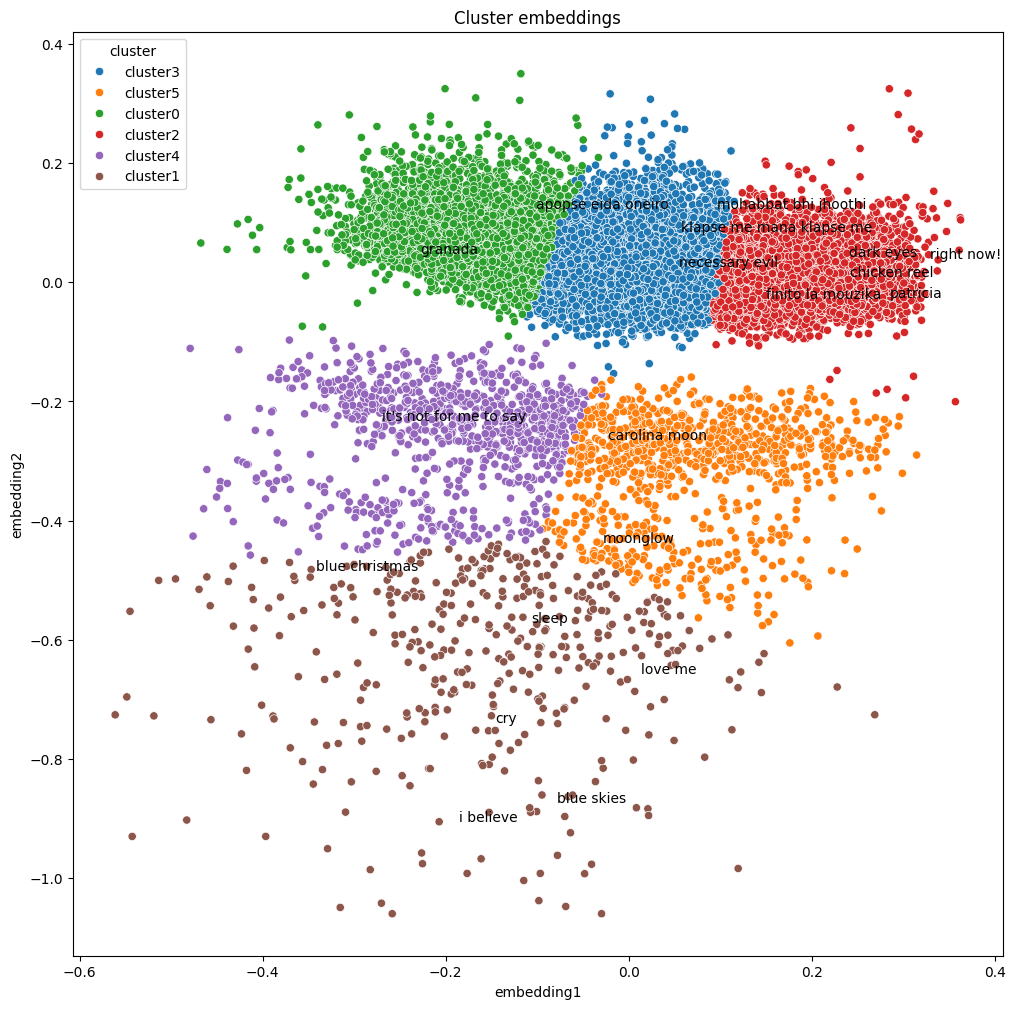

In [ ]:
plot_clusters("cluster")

–ú–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ K-Means –æ–±–Ω–∞—Ä—É–∂–∏–ª –∫–ª–∞—Å—Ç–µ—Ä—ã, –æ—á–µ–Ω—å –ø–æ—Ö–æ–∂–∏–µ –Ω–∞ –µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –≥–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∏–µ –∫–ª–∞—Å—Ç–µ—Ä—ã –ø–æ –∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç–∞–º. –≠—Ç–æ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ –≤ 200-–º–µ—Ä–Ω–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ –ø–æ—Ö–æ–∂–∏–µ –∫–æ–º–∞–Ω–¥—ã —Ä–∞—Å–ø–æ–ª–∞–≥–∞—é—Ç—Å—è –±–ª–∏–∑–∫–æ –¥—Ä—É–≥ –∫ –¥—Ä—É–≥—É, —á—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –≤—ã—è–≤–ª–µ–Ω–æ –∞–ª–≥–æ—Ä–∏—Ç–º–æ–º –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏.

–ù–∞—à–∞ –æ—Ü–µ–Ω–∫–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –º–æ–∂–µ—Ç –±—ã—Ç—å –±–æ–ª–µ–µ –æ–±—ä–µ–∫—Ç–∏–≤–Ω–æ–π —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –º–µ—Ç—Ä–∏–∫–∏, —Ç–∞–∫–æ–π –∫–∞–∫ —Å–∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –∏–Ω–¥–µ–∫—Å –†—ç–Ω–¥–∞, –∫–æ—Ç–æ—Ä—ã–π –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç -1 –¥–æ 1, –≥–¥–µ 0 –æ–∑–Ω–∞—á–∞–µ—Ç —Å–ª—É—á–∞–π–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –º–µ—Ç–æ–∫, –∞ 1 ‚Äî –∏–¥–µ–∞–ª—å–Ω–æ–µ —Å–æ–≤–ø–∞–¥–µ–Ω–∏–µ.


In [ ]:
from sklearn import metrics
metrics.adjusted_rand_score(plot_df.genre, plot_df.cluster)

0.04711220505635648

## –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è

–ò—Å–ø–æ–ª—å–∑—É–µ–º —ç–º–±–µ–¥–¥–∏–Ω–≥–∏, —á—Ç–æ–±—ã –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å –±—É–¥—É—â–∏–µ –º–∞—Ç—á–∏ –∫–∞–∫ –∑–∞–¥–∞—á—É –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.

–°–º–æ–¥–µ–ª–∏—Ä—É–µ–º –µ—ë –∫–∞–∫ –º–Ω–æ–≥–æ–∫–ª–∞—Å—Å–æ–≤—É—é –∑–∞–¥–∞—á—É —Å —Ç—Ä–µ–º—è –∫–ª–∞—Å—Å–∞–º–∏: –ø–æ–±–µ–¥–∞ –¥–æ–º–∞—à–Ω–µ–π –∫–æ–º–∞–Ω–¥—ã, –ø–æ—Ä–∞–∂–µ–Ω–∏–µ –¥–æ–º–∞—à–Ω–µ–π –∫–æ–º–∞–Ω–¥—ã, –Ω–∏—á—å—è.

–≠–º–±–µ–¥–¥–∏–Ω–≥–∏ –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ –∫–∞–∫ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞ XGBoost.

–°–Ω–∞—á–∞–ª–∞ –Ω–∞–º –Ω—É–∂–Ω–æ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é:



In [ ]:
# –ü–æ–ª—É—á–∞–µ–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∂–∞–Ω—Ä—ã –∏–∑ DataFrame –∏ —Å–æ—Ö—Ä–∞–Ω—è–µ–º –∏—Ö –≤ —Å–ø–∏—Å–æ–∫
genres = list(df.genre.unique())

# –°–æ–∑–¥–∞–µ–º –Ω–æ–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü 'results' –≤ DataFrame
# –ö–∞–∂–¥—ã–π –∂–∞–Ω—Ä –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ—Ç—Å—è –≤ —É–Ω–∏–∫–∞–ª—å–Ω—ã–π –∏–Ω–¥–µ–∫—Å
df["results"] = df.genre.apply(lambda g: genres.index(g)).astype(int)

In [ ]:
df.results.value_counts(normalize=True)

results
0    0.248202
3    0.191915
2    0.162273
4    0.142182
1    0.135521
5    0.088045
6    0.031862
Name: proportion, dtype: float64

### –û—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç

–£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º xgboost

In [ ]:
%pip install xgboost

     -------------------------------------- 124.9/124.9 MB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
new_df = df[["results", "train"]].copy()
new_df

results  train
0            0   True
17096        1   True
17097        1   True
17098        1   True
17099        1   True
...        ...    ...
7025         0  False
7026         0  False
7027         0  False
7009         0  False
28371        6  False

[28372 rows x 2 columns]

–ü—Ä–∏–º–µ–Ω—è–µ–º one hot –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ


In [ ]:
import re
import pandas as pd

# –ó–∞–º–µ–Ω—è–µ–º –≤—Å–µ —Å–∏–º–≤–æ–ª—ã –∫—Ä–æ–º–µ –±—É–∫–≤ –Ω–∞ 'x'
df['track_name'] = df['track_name'].apply(lambda t: re.sub(r'[^a-zA-Z]', 'x', t))
df['artist_name'] = df['artist_name'].apply(lambda t: re.sub(r'[^a-zA-Z]', 'x', t))

# –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤ —Å –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–∞ "one-hot encoding"
encoded_cols = pd.get_dummies(df[["track_name", "release_date", "artist_name", "dating", "violence"]])

# –û—Ç–æ–±—Ä–∞–∂–∞–µ–º –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã
encoded_cols

release_date    dating  violence  track_name_"40"  \
0              1950  0.000598  0.063746            False   
17096          1950  0.002392  0.002392            False   
17097          1950  0.002193  0.002193            False   
17098          1950  0.003096  0.003096            False   
17099          1950  0.001645  0.001645            False   
...             ...       ...       ...              ...   
7025           2019  0.017944  0.000849            False   
7026           2019  0.000763  0.128205            False   
7027           2019  0.023184  0.000543            False   
7009           2019  0.089621  0.000446            False   
28371          2019  0.001012  0.075202            False   

       track_name_"african head charge"  track_name_"b" movie box car blues  \
0                                 False                               False   
17096                             False                               False   
17097                             False                               False   
17098                             False                               False   
17099                             False                               False   
...                                 ...                                 ...   
7025                              False                               False   
7026                              False                               False   
7027                              False                               False   
7009                              False                               False   
28371                             False                               False   

       track_name_"belle" of the earth  track_name_"it‚Äôs a good day"  \
0                                False                         False   
17096                            False                         False   
17097                            False                         False   
17098                            False                         False   
17099                            False                         False   
...                                ...                           ...   
7025                             False                         False   
7026                             False                         False   
7027                             False                         False   
7009                             False                         False   
28371                            False                         False   

       track_name_#!*@ me  track_name_#1 crush  ...  \
0                   False                False  ...   
17096               False                False  ...   
17097               False                False  ...   
17098               False                False  ...   
17099               False                False  ...   
...                   ...                  ...  ...   
7025                False                False  ...   
7026                False                False  ...   
7027                False                False  ...   
7009                False                False  ...   
28371               False                False  ...   

       artist_name_zontanoi nekroi  artist_name_zoot sims  \
0                            False                  False   
17096                        False                  False   
17097                        False                  False   
17098                        False                  False   
17099                        False                  False   
...                            ...                    ...   
7025                         False                  False   
7026                         False                  False   
7027                         False                  False   
7009                         False                  False   
28371                        False                  False   

       artist_name_zuco 103  artist_name_zul√∫ hip hop jam  artist_name_zz t

In [ ]:

new_df = new_df.join(encoded_cols)
new_df

results  train  release_date    dating  violence  track_name_"40"  \
0            0   True          1950  0.000598  0.063746            False   
17096        1   True          1950  0.002392  0.002392            False   
17097        1   True          1950  0.002193  0.002193            False   
17098        1   True          1950  0.003096  0.003096            False   
17099        1   True          1950  0.001645  0.001645            False   
...        ...    ...           ...       ...       ...              ...   
7025         0  False          2019  0.017944  0.000849            False   
7026         0  False          2019  0.000763  0.128205            False   
7027         0  False          2019  0.023184  0.000543            False   
7009         0  False          2019  0.089621  0.000446            False   
28371        6  False          2019  0.001012  0.075202            False   

       track_name_"african head charge"  track_name_"b" movie box car blues  \
0                                 False                               False   
17096                             False                               False   
17097                             False                               False   
17098                             False                               False   
17099                             False                               False   
...                                 ...                                 ...   
7025                              False                               False   
7026                              False                               False   
7027                              False                               False   
7009                              False                               False   
28371                             False                               False   

       track_name_"belle" of the earth  track_name_"it‚Äôs a good day"  ...  \
0                                False                         False  ...   
17096                            False                         False  ...   
17097                            False                         False  ...   
17098                            False                         False  ...   
17099                            False                         False  ...   
...                                ...                           ...  ...   
7025                             False                         False  ...   
7026                             False                         False  ...   
7027                             False                         False  ...   
7009                             False                         False  ...   
28371                            False                         False  ...   

       artist_name_zontanoi nekroi  artist_name_zoot sims  \
0                            False                  False   
17096                        False                  False   
17097                        False                  False   
17098                        False                  False   
17099                        False                  False   
...                            ...                    ...   
7025                         False                  False   
7026                         False                  False   
7027                         False                  False   
7009                         False                  False   
28371                        False                  False   

       artist_name_zuco 103  artist_name_zul√∫ hip hop jam  artist_name_zz top  \
0                     False                         False               False   
17096                 False                         False               False   
17097                 False                         False               False   
17098                 False                         False               False   
17099                 False                         False               False  

–°–æ–∑–¥–∞–µ–º –º–Ω–æ–≥–æ–∫–ª–∞—Å—Å–æ–≤—É—é –º–æ–¥–µ–ª—å.


In [ ]:
from xgboost import XGBClassifier

In [ ]:
clf_model = XGBClassifier(n_estimators=500, max_depth=5, objective="multi:softmax")

In [ ]:
# –°–æ–∑–¥–∞–µ–º —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–π –Ω–∞–±–æ—Ä
X_train = new_df[df["train"]].drop(["results"], axis=1)  # –ò—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ñ–∏—á–∏) –±–µ–∑ —Å—Ç–æ–ª–±—Ü–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
y_train = new_df[df["train"]].results  # –¶–µ–ª–µ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è (–∂–∞–Ω—Ä—ã –≤ —á–∏—Å–ª–æ–≤–æ–π —Ñ–æ—Ä–º–µ)

# –°–æ–∑–¥–∞–µ–º –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã–π –Ω–∞–±–æ—Ä
X_val = new_df[~df["train"]].drop(["results"], axis=1)  # –ò—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ, –Ω–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–Ω—ã–µ –≤ –æ–±—É—á–µ–Ω–∏–∏
y_val = new_df[~df["train"]].results  # –¶–µ–ª–µ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è –≤–∞–ª–∏–¥–∞—Ü–∏–∏

üëâüëâüëâüëâüëâüëâüëâüëâüëâüëâüëâüëâ –û—Å—Ç–∞–Ω–æ–≤–∏–ª—Å—è –∑–¥–µ—Å—å (–≤ —Å–ª–µ–¥ —è—á–µ–π–∫–∞ –∫–∞–∫–∞—è-—Ç–æ –æ—à–∏–±–∫–∞, –Ω–∞–¥–æ —Ñ–∏–∫—Å–∏—Ç—å)

In [ ]:
clf_model.fit(X_train, y_train, verbose=1)

ValueError: feature_names must be string, and may not contain [, ] or <

Result

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_val, clf_model.predict(X_val))

0.5283765078109551

### –ì—Ä–∞—Ñ–æ–≤—ã–µ —ç–º–±–µ–¥–∏–Ω–≥–∏

–°–æ–∑–¥–∞–¥–∏–º —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è –∏–∑–≤–ª–µ–∫–∞–µ—Ç –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –¥–ª—è –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–≥–æ –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–∞ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö.


In [ ]:
def get_features_target(mask):

    def get_embeddings(team):
        # –ò–∑–≤–ª–µ–∫–∞–µ—Ç —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ –¥–ª—è –∫–æ–º–∞–Ω–¥—ã –∏–ª–∏ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –º–∞—Å—Å–∏–≤ –∑–Ω–∞—á–µ–Ω–∏–π NaN, –µ—Å–ª–∏ –∫–æ–º–∞–Ω–¥—ã –Ω–µ—Ç –≤ `team_embeddings`
        return team_embeddings.get(team, np.full(200, np.nan))

    # –§–æ—Ä–º–∏—Ä—É–µ–º –º–∞—Ç—Ä–∏—Ü—É –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ X, –æ–±—ä–µ–¥–∏–Ω—è—è —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ –¥–æ–º–∞—à–Ω–∏—Ö –∏ –≥–æ—Å—Ç–µ–≤—ã—Ö –∫–æ–º–∞–Ω–¥
    X = np.hstack((
        np.vstack(df[mask].home_team_id.apply(get_embeddings).values),  # –≠–º–±–µ–¥–¥–∏–Ω–≥–∏ –¥–æ–º–∞—à–Ω–∏—Ö –∫–æ–º–∞–Ω–¥
        np.vstack(df[mask].away_team_id.apply(get_embeddings).values)   # –≠–º–±–µ–¥–¥–∏–Ω–≥–∏ –≥–æ—Å—Ç–µ–≤—ã—Ö –∫–æ–º–∞–Ω–¥
    ))

    # –§–æ—Ä–º–∏—Ä—É–µ–º —Ü–µ–ª–µ–≤–æ–π –≤–µ–∫—Ç–æ—Ä y, —Å–æ–¥–µ—Ä–∂–∞—â–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∏–≥—Ä
    y = df[mask].results.values

    return X, y

In [ ]:
clf_X_train, y_train = get_features_target((df["train"]))
clf_X_test, y_test = get_features_target((~df["train"]))

In [ ]:
clf_X_train.shape, clf_X_test.shape

((35714, 400), (5057, 400))

–£ –Ω–∞—Å –ø–æ 200 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–∞ –∫–æ–º–∞–Ω–¥—É, –ø–æ—Ç–æ–º—É —á—Ç–æ –º–æ–¥–µ–ª—å ComplEx –∏—Å–ø–æ–ª—å–∑—É–µ—Ç –∫–∞–∫ –º–Ω–∏–º—É—é, —Ç–∞–∫ –∏ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—É—é —á–∞—Å—Ç—å –¥–ª—è —Å–≤–æ–∏—Ö —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤, —Ç–∞–∫ —á—Ç–æ —É –Ω–∞—Å –≤ –¥–≤–∞ —Ä–∞–∑–∞ –±–æ–ª—å—à–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º k=100 –≤ –µ—ë –º–æ–¥–µ–ª–∏.

–£ –Ω–∞—Å —Ç–∞–∫–∂–µ –µ—Å—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä–∞—è –Ω–µ–¥–æ—Å—Ç–∞—é—â–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –∏–∑ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ —Å—É—â–Ω–æ—Å—Ç–µ–π, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ—è–≤–ª—è—é—Ç—Å—è —Ç–æ–ª—å–∫–æ –≤ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö –∏ –∫–æ—Ç–æ—Ä—ã–µ –≤—Ä—è–¥ –ª–∏ –±—É–¥—É—Ç –ø—Ä–∞–≤–∏–ª—å–Ω–æ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω—ã.


In [ ]:
np.isnan(clf_X_test).sum()/clf_X_test.shape[1]

105.0

–°–æ–∑–¥–∞–µ–º –º–Ω–æ–≥–æ–∫–ª–∞—Å—Å–æ–≤—É—é –º–æ–¥–µ–ª—å —Å 500 –æ—Ü–µ–Ω—â–∏–∫–∞–º–∏


In [ ]:
clf_model = XGBClassifier(n_estimators=500, max_depth=5, objective="multi:softmax")

–û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å, –∏—Å–ø–æ–ª—å–∑—É—è –≤—Å–µ –æ–±—É—á–∞—é—â–∏–µ –æ–±—Ä–∞–∑—Ü—ã.


In [ ]:
clf_model.fit(clf_X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

–ë–∞–∑–æ–≤–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å –¥–ª—è —ç—Ç–æ–π –∑–∞–¥–∞—á–∏ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 47%, —Ç–∞–∫ –∫–∞–∫ —ç—Ç–æ —á–∞—Å—Ç–æ—Ç–∞ —Å–∞–º–æ–π —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–Ω–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏.


In [ ]:
df[~df["train"]].results.value_counts(normalize=True)

results
0    0.471030
2    0.287325
1    0.241645
Name: proportion, dtype: float64

In [ ]:
metrics.accuracy_score(y_test, clf_model.predict(clf_X_test))

0.527783270713862

–•–æ—Ç—è –±–∞–∑–æ–≤–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å –¥–ª—è —ç—Ç–æ–π –∑–∞–¥–∞—á–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –±—ã–ª–∞ 47%, —Ç–æ–ª—å–∫–æ –Ω–∞ –æ—Å–Ω–æ–≤–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ –º—ã —Å–º–æ–≥–ª–∏ —Å–æ–∑–¥–∞—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä, –∫–æ—Ç–æ—Ä—ã–π –¥–æ—Å—Ç–∏–≥–∞–µ—Ç —Ç–æ—á–Ω–æ—Å—Ç–∏ –≤ 53%.

–í –±—É–¥—É—â–µ–º –º–æ–∂–Ω–æ –¥–æ–±–∞–≤–∏—Ç—å –±–æ–ª—å—à–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫ –≤ –º–æ–¥–µ–ª—å (–Ω–µ —Å–≤—è–∑–∞–Ω–Ω—ã—Ö —Å —ç–º–±–µ–¥–¥–∏–Ω–≥–∞–º–∏) –∏ –Ω–∞—Å—Ç—Ä–æ–∏—Ç—å –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏.


## Link prediction

–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ —Å–≤—è–∑–µ–π –ø–æ–∑–≤–æ–ª—è–µ—Ç –Ω–∞–º –≤–æ—Å—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞—Ç—å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ —Å–≤—è–∑–∏ –≤ –≥—Ä–∞—Ñ–µ


In [ ]:
X_train, X_valid = train_test_split_no_unseen(np.array(triples), test_size=10000)

In [ ]:
df = pd.DataFrame(X_train,columns = ['subject','predicate','object'])
matchSubject = "Match1324"
print(df[df.subject==matchSubject])

          subject     predicate              object
102407  Match1324    awayScores                   1
116179  Match1324     inCountry       CountryBrazil
126093  Match1324    homeScores                   4
158124  Match1324  inTournament  TournamentFriendly
172564  Match1324        inCity    CityRioDeJaneiro
266651  Match1324     isNeutral               False


–£–¥–∞–ª–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç —ç—Ç–æ–≥–æ –º–∞—Ç—á–∞ –∏–∑ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–≥–æ DataFrame.

In [ ]:
dfFiltered = np.array(df[(df.subject!=matchSubject) | ((df.subject==matchSubject) & ~df.predicate.isin(["homeScores","awayScores"]))])

–û–±—É—á–∏–º –º–æ–¥–µ–ª—å –Ω–∞ —Ç—Ä–æ–π–∫–∞—Ö –±–µ–∑ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –¥–ª—è —Ç–µ–∫—É—â–µ–≥–æ –º–∞—Ç—á–∞.



In [ ]:
model.fit(dfFiltered)

Epoch 1/100
384/384 [==============================] - 41s 108ms/step - loss: 5672.3242
Epoch 2/100
384/384 [==============================] - 41s 106ms/step - loss: 5542.9214
Epoch 3/100
384/384 [==============================] - 41s 106ms/step - loss: 5419.5327
Epoch 4/100
384/384 [==============================] - 42s 111ms/step - loss: 5301.7891
Epoch 5/100
384/384 [==============================] - 42s 111ms/step - loss: 5189.2979
Epoch 6/100
384/384 [==============================] - 41s 108ms/step - loss: 5081.7212
Epoch 7/100
384/384 [==============================] - 41s 106ms/step - loss: 4978.7417
Epoch 8/100
384/384 [==============================] - 41s 107ms/step - loss: 4880.0381
Epoch 9/100
384/384 [==============================] - 41s 106ms/step - loss: 4785.3955
Epoch 10/100
384/384 [==============================] - 41s 106ms/step - loss: 4694.5400
Epoch 11/100
384/384 [==============================] - 41s 107ms/step - loss: 4607.2554
Epoch 12/100
384/384 [========

–ú—ã –º–æ–∂–µ–º —Å–æ–∑–¥–∞—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ —É—Ç–≤–µ—Ä–∂–¥–µ–Ω–∏–π –¥–ª—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞ —ç—Ç–æ–≥–æ –º–∞—Ç—á–∞.

In [ ]:
statements = np.array([
    [f'{matchSubject}', 'homeScores', '0'],
    [f'{matchSubject}', 'homeScores', '1'],
    [f'{matchSubject}', 'homeScores', '2'],
    [f'{matchSubject}', 'homeScores', '3'],
    [f'{matchSubject}', 'homeScores', '4'],
    [f'{matchSubject}', 'awayScores', '0'],
    [f'{matchSubject}', 'awayScores', '1'],
    [f'{matchSubject}', 'awayScores', '2'],
    [f'{matchSubject}', 'awayScores', '3'],
    [f'{matchSubject}', 'awayScores', '4']
])

–û–±—ä–µ–¥–∏–Ω–∏—Ç–µ —Ç—Ä–æ–π–∫–∏ –≥—Ä–∞—Ñ–∞ —Å –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–Ω—ã–º–∏ —É—Ç–≤–µ—Ä–∂–¥–µ–Ω–∏—è–º–∏.

In [ ]:
statements_filter = np.array(list({tuple(i) for i in np.vstack((dfFiltered, statements))}))
statements_filter

array([['Match33087', 'isNeutral', 'False'],
       ['TeamWales', 'isAwayTeamIn', 'Match5782'],
       ['Match5992', 'awayScores', '5'],
       ...,
       ['Match14640', 'inCountry', 'CountryChad'],
       ['Match21824', 'isNeutral', 'False'],
       ['Match11653', 'homeScores', '1']], dtype='<U48')

In [ ]:
ranks = model.evaluate(statements,
                      use_filter={'train': dfFiltered,
                                  'test': statements},
                      corrupt_side='s,o',
                      verbose=True)

2/2 [==============================] - 2s 1s/step


In [ ]:
scores = model.predict(statements)
scores

array([-0.5846524 ,  0.08066474, -0.48785803,  1.5089438 ,  5.684367  ,
       -0.4420216 ,  2.5865698 ,  2.0160317 ,  1.2500255 , -0.39739496],
      dtype=float32)

–í—ã–≤–µ–¥–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π

In [ ]:
from scipy.special import expit
probs = expit(scores)

pd.DataFrame(list(zip([' '.join(x) for x in statements],
                      ranks,
                      np.squeeze(scores),
                      np.squeeze(probs))),
             columns=['statement', 'rank', 'score', 'prob']).sort_values("prob")

statement            rank     score      prob
0  Match1324 homeScores 0  [24323, 37191] -0.584652  0.357863
2  Match1324 homeScores 2  [25271, 36315] -0.487858  0.380398
5  Match1324 awayScores 0  [18691, 33323] -0.442022  0.391259
9  Match1324 awayScores 4  [32198, 31962] -0.397395  0.401938
1  Match1324 homeScores 1  [20895, 10848]  0.080665  0.520155
8  Match1324 awayScores 3     [23953, 86]  1.250026  0.777304
3  Match1324 homeScores 3     [22831, 67]  1.508944  0.818905
7  Match1324 awayScores 2     [17498, 22]  2.016032  0.882470
6  Match1324 awayScores 1      [12518, 6]  2.586570  0.929992
4  Match1324 homeScores 4      [16943, 1]  5.684367  0.996613